In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/precog-assignment/fi.csv
/kaggle/input/precog-assignment/fi-2.csv
/kaggle/input/precog-assignment/judge_act_pre-2.csv
/kaggle/input/precog-assignment/final.csv
/kaggle/input/precog-assignment/state_time.png
/kaggle/input/precog-assignment/state_cases.png
/kaggle/input/precog-assignment/Judge_Act_merge.csv
/kaggle/input/precog-assignment/judges_clean/judges_clean.csv
/kaggle/input/precog-assignment/acts_sections/acts_sections.csv
/kaggle/input/precog-assignment/cases/cases_2015.csv
/kaggle/input/precog-assignment/cases/cases_2012.csv
/kaggle/input/precog-assignment/cases/cases_2018.csv
/kaggle/input/precog-assignment/cases/cases_2013.csv
/kaggle/input/precog-assignment/cases/cases_2017.csv
/kaggle/input/precog-assignment/cases/cases_2010.csv
/kaggle/input/precog-assignment/cases/cases_2014.csv
/kaggle/input/precog-assignment/cases/cases_2016.csv
/kaggle/input/precog-assignment/cases/cases_2011.csv
/kaggle/input/precog-assignment/keys/type_name_key.csv
/kaggle/input/precog-

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from tqdm import tqdm
from sklearn.cluster import KMeans

import seaborn as sns


In [3]:
data = pd.read_csv("../input/precog-assignment/final.csv",usecols=["criminal","female_judge","female_defendant","tenure","time_taken"])
data.head()

,criminal,female_judge,female_defendant,tenure,time_taken
0,0.0,0 nonfemale,0 male,43,200
1,0.0,0 nonfemale,0 male,138,421
2,1.0,0 nonfemale,0 male,621,869
3,1.0,0 nonfemale,0 male,1000,1174
4,1.0,0 nonfemale,0 male,441,578


In [4]:
data = data[(data["time_taken"] > 0) & (data["tenure"] > 0)]

In [5]:
num_attributes = ["tenure","time_taken"]
cat_attributes = ["criminal","female_judge","female_defendant"]

In [6]:
for c in cat_attributes:
    data[c] = data[c].astype('category')
print(data.dtypes)
    

criminal            category
female_judge        category
female_defendant    category
tenure                 int64
time_taken             int64
dtype: object


In [7]:
kmc_df = pd.get_dummies(data)
for c in kmc_df.columns:
    pt = PowerTransformer()
    kmc_df.loc[:, c] = pt.fit_transform(np.array(kmc_df[c]).reshape(-1, 1))

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(kmc_df)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,7.182958,2.929393
1,7.138063,2.935565
2,0.418893,-0.142842
3,0.405208,-0.142981
4,0.451623,-0.148274


In [9]:
sse = {}
for k in tqdm(range(2, 20)):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pca_df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

100%|██████████| 18/18 [09:08<00:00, 30.49s/it]


In [10]:
fig = go.Figure(data=go.Scatter(x=list(sse.keys()), y=list(sse.values())))
fig.show()

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(pca_df)

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

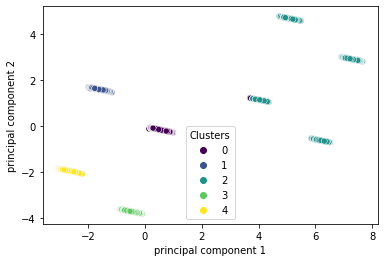

In [12]:
pca_df['Clusters'] = kmeans.labels_

sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df,palette='viridis')

In [13]:
data['Clusters'] = kmeans.labels_
data.head()

,criminal,female_judge,female_defendant,tenure,time_taken,Clusters
0,0.0,0 nonfemale,0 male,43,200,2
1,0.0,0 nonfemale,0 male,138,421,2
2,1.0,0 nonfemale,0 male,621,869,0
3,1.0,0 nonfemale,0 male,1000,1174,0
4,1.0,0 nonfemale,0 male,441,578,0


In [14]:
pd.Series(kmeans.labels_).value_counts()

0    1966648
1     759200
3     236132
4      89912
2      63804
dtype: int64

In [43]:
tenure= []
time_taken=[]

# Cluster 0 analysis

In [26]:
cl0 = data[data["Clusters"]==0]
cl0.head()

,criminal,female_judge,female_defendant,tenure,time_taken,Clusters
2,1.0,0 nonfemale,0 male,621,869,0
3,1.0,0 nonfemale,0 male,1000,1174,0
4,1.0,0 nonfemale,0 male,441,578,0
5,1.0,0 nonfemale,0 male,376,737,0
9,1.0,0 nonfemale,0 male,194,40,0


In [31]:
print(cl0["criminal"].value_counts())
print()
print(cl0["female_judge"].value_counts())
print()
print(cl0["female_defendant"].value_counts())

1.0    1966639
0.0          9
Name: criminal, dtype: int64

0 nonfemale    1966639
1 female             9
Name: female_judge, dtype: int64

0 male      1966639
1 female          9
Name: female_defendant, dtype: int64


In [32]:
cl0[cl0["criminal"] == 0].head(9)

,criminal,female_judge,female_defendant,tenure,time_taken,Clusters
218793,0.0,1 female,1 female,61,1173,0
282732,0.0,1 female,1 female,2,1196,0
355259,0.0,1 female,1 female,141,1368,0
438587,0.0,1 female,1 female,4,1242,0
2559829,0.0,1 female,1 female,49,1148,0
2625069,0.0,1 female,1 female,96,1619,0
2715255,0.0,1 female,1 female,48,1350,0
2962776,0.0,1 female,1 female,40,1100,0
2987670,0.0,1 female,1 female,54,1463,0


In [44]:
tenure.append(data[data["Clusters"]==0]["tenure"].mean())
time_taken.append(data[data["Clusters"]==0]["time_taken"].mean())

**From the above analysis, we can see that almost all the records are cases where the judge and the defendant afre male and the case is criminal of nature.**

# Cluster 1 analysis

In [34]:
cl1 = data[data["Clusters"] == 1]
cl1.head()

,criminal,female_judge,female_defendant,tenure,time_taken,Clusters
6,1.0,1 female,0 male,163,797,1
417,1.0,1 female,0 male,382,17,1
419,1.0,1 female,0 male,616,22,1
420,1.0,1 female,0 male,504,12,1
421,1.0,1 female,0 male,324,6,1


In [35]:
print(cl1["criminal"].value_counts())
print()
print(cl1["female_judge"].value_counts())
print()
print(cl1["female_defendant"].value_counts())

1.0    759200
0.0         0
Name: criminal, dtype: int64

1 female       759200
0 nonfemale         0
Name: female_judge, dtype: int64

0 male      759200
1 female         0
Name: female_defendant, dtype: int64


In [45]:
tenure.append(data[data["Clusters"]==1]["tenure"].mean())
time_taken.append(data[data["Clusters"]==1]["time_taken"].mean())

# Cluster 2 Analysis

In [36]:
cl2 = data[data["Clusters"] == 2]
cl2.head()

,criminal,female_judge,female_defendant,tenure,time_taken,Clusters
0,0.0,0 nonfemale,0 male,43,200,2
1,0.0,0 nonfemale,0 male,138,421,2
8,0.0,0 nonfemale,1 female,341,5,2
135,0.0,0 nonfemale,0 male,97,588,2
141,0.0,0 nonfemale,0 male,124,275,2


In [37]:
print(cl2["criminal"].value_counts())
print()
print(cl2["female_judge"].value_counts())
print()
print(cl2["female_defendant"].value_counts())

0.0    63804
1.0        0
Name: criminal, dtype: int64

0 nonfemale    46805
1 female       16999
Name: female_judge, dtype: int64

0 male      57850
1 female     5954
Name: female_defendant, dtype: int64


In [46]:
tenure.append(data[data["Clusters"]==2]["tenure"].mean())
time_taken.append(data[data["Clusters"]==2]["time_taken"].mean())

# Cluster 3 Analysis

In [38]:
cl3 = data[data["Clusters"] == 3]
cl3.head()

,criminal,female_judge,female_defendant,tenure,time_taken,Clusters
12,1.0,0 nonfemale,1 female,610,310,3
17,1.0,0 nonfemale,1 female,547,57,3
20,1.0,0 nonfemale,1 female,773,124,3
22,1.0,0 nonfemale,1 female,1115,393,3
56,1.0,0 nonfemale,1 female,670,106,3


In [39]:
print(cl3["criminal"].value_counts())
print()
print(cl3["female_judge"].value_counts())
print()
print(cl3["female_defendant"].value_counts())

1.0    236132
0.0         0
Name: criminal, dtype: int64

0 nonfemale    236132
1 female            0
Name: female_judge, dtype: int64

1 female    236132
0 male           0
Name: female_defendant, dtype: int64


In [47]:
tenure.append(data[data["Clusters"]==3]["tenure"].mean())
time_taken.append(data[data["Clusters"]==3]["time_taken"].mean())

# Cluster 4 Analysis

In [40]:
cl4 = data[data["Clusters"] == 4]
cl4.head()


,criminal,female_judge,female_defendant,tenure,time_taken,Clusters
7,1.0,1 female,1 female,239,1005,4
18,1.0,1 female,1 female,570,779,4
841,1.0,1 female,1 female,456,45,4
1198,1.0,1 female,1 female,235,257,4
1199,1.0,1 female,1 female,21,1,4


In [41]:
print(cl4["criminal"].value_counts())
print()
print(cl4["female_judge"].value_counts())
print()
print(cl4["female_defendant"].value_counts())

1.0    89912
0.0        0
Name: criminal, dtype: int64

1 female       89912
0 nonfemale        0
Name: female_judge, dtype: int64

1 female    89912
0 male          0
Name: female_defendant, dtype: int64


In [48]:
tenure.append(data[data["Clusters"]==4]["tenure"].mean())
time_taken.append(data[data["Clusters"]==4]["time_taken"].mean())

# Observations

From the above analysis, we can see that the clustering has been done mostly on the different combinations of the "female_judge" and "female_defendant" values for criminal cases with non-criminal cases grouped under a seperate cluster(cluster 2).

**Cluster 0 -> Criminal cases, Male judge and Male defendant**

**Cluster 1 -> Criminal cases, Female judge and Male defendant**

**Cluster 2 -> Non-criminal cases**

**Cluster 3 -> Criminal cases, Male judge and Female defendant**

**Cluster 4 -> Criminal cases, Female judge and Male defendant**

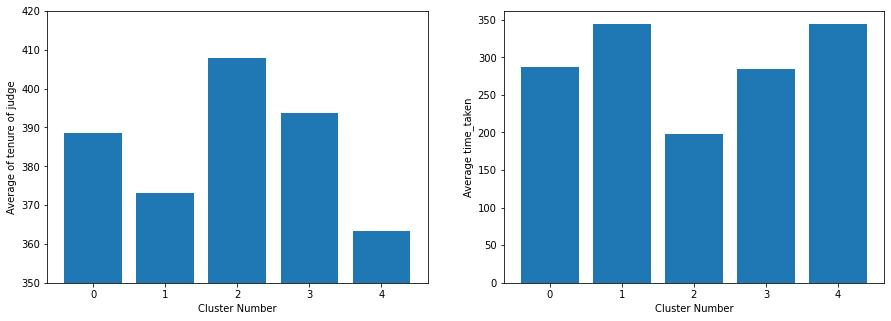

In [58]:
names = list(range(0,5))
values = tenure

plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.xlabel("Cluster Number")
plt.ylabel("Average of tenure of judge")
plt.ylim(350,420)
plt.bar(range(len(tenure)), values, tick_label=names)


plt.subplot(1, 2, 2)
plt.xlabel("Cluster Number")
plt.ylabel("Average time_taken")
values = time_taken
plt.bar(range(len(tenure)), values, tick_label=names)

plt.show()


# Insights

From the above data anlysis, we can gleam the following insights:

1. Average tenure of judges dealing with non-criminal cases is higher than that of the judges dealing with criminal cases. This could be a contributing factor to the reduced time_taken to deal with non-criminal cases, which we have seen here and in more detail in Analysis-1.

2. The correlation between tenure and time_taken can again be seen when we observe the gender split. The tenure of Female judges can be seen to be less than that of Male judges on average, and this correlates to the time taken of Female judges greater than that of Male judges